## BREAKING IMAGE CAPTCHA CNN MODEL WITH CIFAR-10 Dataset

In [34]:
### Import various libraries ###
import tensorflow as tf 
import numpy as np
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
import timeit

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils

%matplotlib inline

In [2]:
# Is a CUDA GPU set up correctly?
tf.config.list_physical_devices('GPU')

[]

In [3]:
### Import CIFAR-10 Data ###
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [4]:
### Shape of the Training data ###
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
### Shape of the Test data ###
print(Y_train.shape)
print(Y_test.shape)

(50000, 1)
(10000, 1)


In [6]:
### Dimensionality of Y_train ###
Y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
### Convert Y_train from a 2 dimensional to 1 dimensional array ###
Y_train = Y_train.reshape(-1,)
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [8]:
### Plot sample image ###
# plt.imshow(X_train[35])

In [9]:
### Assign the classes with their actual names and not numbered labels ###
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

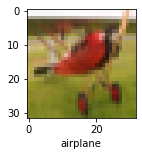

In [10]:
### Plot sample image again with the proper class label ###
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train,Y_train,35)

In [11]:
### Normalize data by dividing both X train test by 255 ###
X_train = X_train / 255.0
X_test = X_test / 255.0

## Tyler Model 1 - Adam Amsgrad, no layer dropout

In [103]:
### Build a convolutional neural network to compare its performance ###

# 79% accuracy @ 40 epochs
cnetwork_adamamsgrad = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [104]:
### Compile and Fit the model ###
from tensorflow.keras.optimizers import Adam

cnetwork_adamamsgrad.compile(optimizer=Adam(amsgrad=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history_adamamsgrad = cnetwork_adamamsgrad.fit(X_train, 
                    Y_train, 
                    epochs=50,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/50
391/391 [==============================] - 4s 9ms/step - loss: 1.4560 - accuracy: 0.4766 - val_loss: 1.9660 - val_accuracy: 0.3709
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 1.0682 - accuracy: 0.6193 - val_loss: 1.0378 - val_accuracy: 0.6395
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 0.9042 - accuracy: 0.6806 - val_loss: 0.9942 - val_accuracy: 0.6494
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 0.7853 - accuracy: 0.7224 - val_loss: 0.9516 - val_accuracy: 0.6775
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.6961 - accuracy: 0.7553 - val_loss: 0.9533 - val_accuracy: 0.6801
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.6223 - accuracy: 0.7816 - val_loss: 0.8629 - val_accuracy: 0.7045
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 0.5565 - accuracy: 0.8015 - val_loss: 0.9587 - val_accuracy: 0.6886
Epoch 

In [105]:
cnetwork_adamamsgrad.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.9916 - accuracy: 0.7188


[1.9916419982910156, 0.7188000082969666]

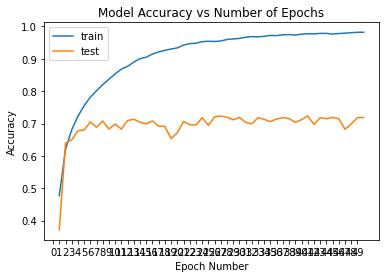

In [106]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history_adamamsgrad.history['accuracy'])), history_adamamsgrad.history['accuracy'])
plt.plot(range(1,1+len(history_adamamsgrad.history['val_accuracy'])), history_adamamsgrad.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,50,1))
plt.show()

## Model 2: blah

## Model 3: Incrementing filter size in each layer w/ dropout

In [127]:
# ~80% @ 40 epochs
model_3 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.12),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(len(classes), activation='softmax'),
])

In [128]:
### Compile and Fit the model ###
from tensorflow.keras.optimizers import Adam

model_3.compile(optimizer=Adam(amsgrad=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fitting the model with batch size of 128 and 20 training epochs ###
history_3 = model_3.fit(X_train, 
                    Y_train, 
                    epochs=30,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/30
391/391 [==============================] - 6s 13ms/step - loss: 1.5560 - accuracy: 0.4467 - val_loss: 5.7158 - val_accuracy: 0.1008
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 1.1166 - accuracy: 0.6032 - val_loss: 1.1459 - val_accuracy: 0.5984
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.9573 - accuracy: 0.6665 - val_loss: 0.9340 - val_accuracy: 0.6743
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.8434 - accuracy: 0.7059 - val_loss: 0.9081 - val_accuracy: 0.6797
Epoch 5/30
391/391 [==============================] - 5s 11ms/step - loss: 0.7697 - accuracy: 0.7316 - val_loss: 0.9988 - val_accuracy: 0.6702
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.7083 - accuracy: 0.7554 - val_loss: 1.0359 - val_accuracy: 0.6564
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.6684 - accuracy: 0.7699 - val_loss: 0.7008 - val_accuracy: 0.7618

In [129]:
model_3.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6511 - accuracy: 0.8085


[0.6511107683181763, 0.8084999918937683]

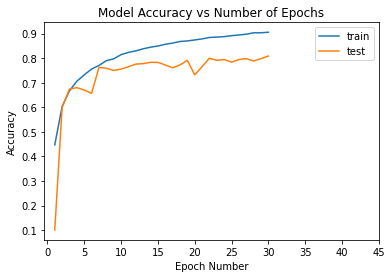

In [130]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history_3.history['accuracy'])), history_3.history['accuracy'])
plt.plot(range(1,1+len(history_3.history['val_accuracy'])), history_3.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,50,5))
plt.show()

## Model 4: resnet

In [12]:
# ResNet152 @ 20 epochs: 32% acc
# Base model from lib
model_resnet_base = tf.keras.applications.ResNet50(weights='imagenet', 
                                                    include_top=False, 
                                                    input_shape=(32,32,3))
for layer in model_resnet_base.layers:
  layer.trainable = False

In [13]:
# Customisable output layers
x = model_resnet_base.output

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(len(classes), activation='softmax')(x)

model_resnet_output = x

In [14]:
resnet_model = tf.keras.Model(inputs=model_resnet_base.input, outputs=model_resnet_output)
resnet_model.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [15]:
history_resnet = resnet_model.fit(X_train, 
                                  Y_train, 
                                  batch_size=64, 
                                  epochs=20, 
                                  validation_data=(X_test, Y_test))

Epoch 1/20
782/782 [==============================] - 43s 53ms/step - loss: 1.8923 - accuracy: 0.3229 - val_loss: 2.3858 - val_accuracy: 0.2838
Epoch 2/20
782/782 [==============================] - 40s 51ms/step - loss: 1.7008 - accuracy: 0.3889 - val_loss: 2.7844 - val_accuracy: 0.1917
Epoch 3/20
782/782 [==============================] - 41s 53ms/step - loss: 1.6574 - accuracy: 0.4077 - val_loss: 6.1767 - val_accuracy: 0.1589
Epoch 4/20
782/782 [==============================] - 41s 53ms/step - loss: 1.6252 - accuracy: 0.4270 - val_loss: 2.4186 - val_accuracy: 0.2462
Epoch 5/20
782/782 [==============================] - 39s 50ms/step - loss: 1.6033 - accuracy: 0.4326 - val_loss: 3.9191 - val_accuracy: 0.1587
Epoch 6/20
782/782 [==============================] - 40s 52ms/step - loss: 1.5887 - accuracy: 0.4374 - val_loss: 3.0063 - val_accuracy: 0.2161
Epoch 7/20
782/782 [==============================] - 40s 51ms/step - loss: 1.5769 - accuracy: 0.4438 - val_loss: 2.3547 - val_accuracy:

In [16]:
resnet_model.evaluate(X_test,Y_test)

313/313 [==============================] - 9s 28ms/step - loss: 2.0153 - accuracy: 0.3143


[2.015301465988159, 0.314300000667572]

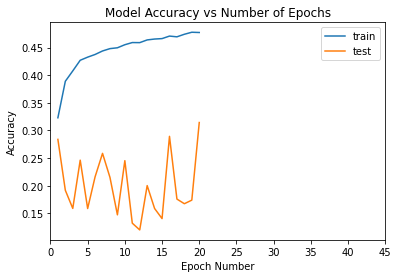

In [17]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history_resnet.history['accuracy'])), history_resnet.history['accuracy'])
plt.plot(range(1,1+len(history_resnet.history['val_accuracy'])), history_resnet.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,50,5))
plt.show()

## Model 5: experimenting on model 3 w/ weight decay

In [80]:
start_time = timeit.default_timer()

weight_decay = 1e-4

# 77% @ 50 epochs
model_5 = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3),
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, 3, activation='relu', padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, 3, activation='relu', padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D(2),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    #layers.Conv2D(128, 3, activation='relu', padding='same'),
    #layers.MaxPooling2D(2),
    #layers.Dropout(0.2),
    #layers.BatchNormalization(),
    
    layers.Flatten(),
    
    #layers.Dense(128, activation='relu'),
    #layers.Dropout(0.2),
    #layers.BatchNormalization(),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(len(classes), activation='softmax'),
])

In [81]:
### Compile and Fit the model ###
from tensorflow.keras.optimizers import Adam


model_5.compile(optimizer=Adam(amsgrad=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Fitting the model with batch size of 128 and 20 training epochs ###
history_5 = model_5.fit(X_train, 
                    Y_train, 
                    epochs=50,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))


Epoch 1/50
391/391 [==============================] - 10s 23ms/step - loss: 1.8939 - accuracy: 0.3212 - val_loss: 2.8282 - val_accuracy: 0.1327
Epoch 2/50
391/391 [==============================] - 9s 22ms/step - loss: 1.4969 - accuracy: 0.4588 - val_loss: 1.3999 - val_accuracy: 0.5072
Epoch 3/50
391/391 [==============================] - 9s 22ms/step - loss: 1.3383 - accuracy: 0.5255 - val_loss: 1.1399 - val_accuracy: 0.5934
Epoch 4/50
391/391 [==============================] - 9s 22ms/step - loss: 1.2305 - accuracy: 0.5665 - val_loss: 1.1010 - val_accuracy: 0.6069
Epoch 5/50
391/391 [==============================] - 9s 22ms/step - loss: 1.1453 - accuracy: 0.5996 - val_loss: 1.1107 - val_accuracy: 0.6125
Epoch 6/50
391/391 [==============================] - 8s 21ms/step - loss: 1.0895 - accuracy: 0.6203 - val_loss: 0.9537 - val_accuracy: 0.6737
Epoch 7/50
391/391 [==============================] - 8s 22ms/step - loss: 1.0456 - accuracy: 0.6410 - val_loss: 0.9577 - val_accuracy: 0.663

In [82]:
model_5.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6792 - accuracy: 0.7734


[0.6791932582855225, 0.7734000086784363]

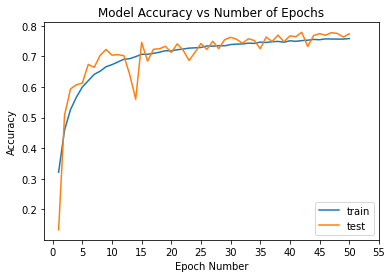

In [83]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history_5.history['accuracy'])), history_5.history['accuracy'])
plt.plot(range(1,1+len(history_5.history['val_accuracy'])), history_5.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 60, 5))
plt.show()

In [84]:
mins = (timeit.default_timer() - start_time) / 60
print(f'Time Taken: {mins:.2f} mins')

Time Taken: 7.07 mins


## Model 6: Giovenale's model
https://www.kaggle.com/c/cifar-10/discussion/40237

In [70]:
start_time = timeit.default_timer()


baseMapNum = 32
weight_decay = 1e-4

# 84% @ 40 epochs
model_6 = tf.keras.Sequential([
    layers.Conv2D(baseMapNum, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:],
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(2*baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(2*baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),  
   
    layers.Conv2D(4*baseMapNum, (3,3), padding='same', activation='relu', 
                  kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(len(classes), activation='softmax'),
    
])

In [71]:
### Compile and Fit the model ###
from tensorflow.keras.optimizers import Adam


model_6.compile(optimizer=Adam(amsgrad=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Fitting the model with batch size of 128 and 20 training epochs ###
history_6 = model_6.fit(X_train, 
                    Y_train, 
                    epochs=80,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/80
391/391 [==============================] - 44s 108ms/step - loss: 1.8597 - accuracy: 0.4343 - val_loss: 2.8190 - val_accuracy: 0.2193
Epoch 2/80
391/391 [==============================] - 41s 106ms/step - loss: 1.2974 - accuracy: 0.5923 - val_loss: 1.0741 - val_accuracy: 0.6361
Epoch 3/80
391/391 [==============================] - 42s 107ms/step - loss: 1.0995 - accuracy: 0.6570 - val_loss: 1.0955 - val_accuracy: 0.6510
Epoch 4/80
391/391 [==============================] - 42s 106ms/step - loss: 0.9689 - accuracy: 0.6908 - val_loss: 0.8959 - val_accuracy: 0.7067
Epoch 5/80
391/391 [==============================] - 41s 106ms/step - loss: 0.8668 - accuracy: 0.7193 - val_loss: 0.9062 - val_accuracy: 0.7019
Epoch 6/80
391/391 [==============================] - 42s 107ms/step - loss: 0.8088 - accuracy: 0.7352 - val_loss: 0.8318 - val_accuracy: 0.7181
Epoch 7/80
391/391 [==============================] - 41s 106ms/step - loss: 0.7335 - accuracy: 0.7569 - val_loss: 0.7355 - val_ac

391/391 [==============================] - 44s 112ms/step - loss: 0.3487 - accuracy: 0.9008 - val_loss: 0.5893 - val_accuracy: 0.8358
Epoch 58/80
391/391 [==============================] - 45s 115ms/step - loss: 0.3508 - accuracy: 0.9012 - val_loss: 0.6566 - val_accuracy: 0.8174
Epoch 59/80
391/391 [==============================] - 45s 115ms/step - loss: 0.3542 - accuracy: 0.8991 - val_loss: 0.6012 - val_accuracy: 0.8350
Epoch 60/80
391/391 [==============================] - 44s 112ms/step - loss: 0.3486 - accuracy: 0.9023 - val_loss: 0.5757 - val_accuracy: 0.8396
Epoch 61/80
391/391 [==============================] - 43s 110ms/step - loss: 0.3424 - accuracy: 0.9039 - val_loss: 0.5460 - val_accuracy: 0.8484
Epoch 62/80
391/391 [==============================] - 43s 109ms/step - loss: 0.3499 - accuracy: 0.9005 - val_loss: 0.5684 - val_accuracy: 0.8418
Epoch 63/80
391/391 [==============================] - 42s 108ms/step - loss: 0.3449 - accuracy: 0.9038 - val_loss: 0.5559 - val_accurac

In [72]:
model_6.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5433 - accuracy: 0.8515


[0.5432793498039246, 0.8514999747276306]

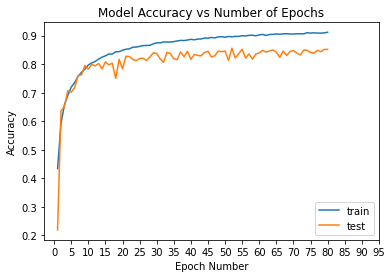

In [73]:
### Plot the comparison between training and test accuracy ###
plt.plot(range(1,1+len(history_6.history['accuracy'])), history_6.history['accuracy'])
plt.plot(range(1,1+len(history_6.history['val_accuracy'])), history_6.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 100, 5))
plt.show()

In [74]:
mins = (timeit.default_timer() - start_time) / 60
print(f'Time Taken: {mins:.2f} mins')

Time Taken: 57.18 mins
